# 二维随机变量
一般来说，大写字母X或者Y表示所有可能出现的情况，它们是一个集合，直接让它们和具体的数值进行比较运算，相当于是让集合里面具体的元素和数值去做比较，这个比较得到的结果是一个符合条件的新的集合。

## 联合分布函数 
F(x,y) = P(X<=x, Y<=y)

## 边缘分布函数
当x或者y有一方趋于正无穷时，这时F退化为只和另一方相关的函数，但是这个对另一方的积分为1，我们把这个称为另一方的边缘分布函数。

## 二维随机变量的独立性
如果
    F(x,y) = FX(x) * FY(y)
我们称x和y是独立的

## 密度函数
不论是联合分布函数，还是边缘分布函数，它们都有对应的概率密度函数，它们之间也存在对应的数学关系，分布函数和密度函数是求导和积分的关系，而对应的密度函数之间存在下面的关系：
    fx(x) = sp.interagate(fxy, (y, -sp.oo, sp.oo))

## 条件概率密度
因为有两个随机变量，所以二者之间会出现条件概率，这个计算的方法和正常的条件概率计算的方法是一致的：
    fxy(x|y) = fxy(x,y)/fy(y) 也即
    p(x|y) = p(xy)/p(y)

## 二维随机变量函数的分布
对于离散型的话，可以直接通过列表，计算出所有的取值，然后再直接对应相加。我觉得对于离散型的用Python计算的时候，可以就简单的采用字典的方式即可，前面表示变量的取值，后面表示函数值。

对于连续型的话，本质也是把新的要求的分布转化成旧的分布的积分，然后求导可以得到概率密度函数。很多时候其实就是利用定义，利用区间来进行转化来求。常见的有求最大值和最小值的，都比较简单。
![20240921183605](https://raw.githubusercontent.com/Cipivious/my_try/main/img/20240921183605.png)

## 卷积公式的推导
求Z = X + Y这个二维随机变量函数的分布得
    F(z) = P(Z <= z) = P(X + Y <= z) = sp.intergate(sp.interagate(fxy, (x, -sp.oo, z-x)),(y, -sp.oo, sp.oo))
    f(z) = sp.interagate(fxy(x, z-x), (x, -sp.oo, sp.oo))
如果x和y是独立的，上式也可以写作
    f(z) = sp.interagate(fx(x)*fy(z-x), (x, -sp.oo, sp.oo)) 或者
    f(z) = sp.interagate(fy(z-y)*fy(y), (y, -sp.oo, sp.oo))
我们把上面的两个式子称为卷积公式，
![20240921185757](https://raw.githubusercontent.com/Cipivious/my_try/main/img/20240921185757.png)


In [11]:
import sympy as sp

# 定义符号变量
x, y = sp.symbols('x y')

# 定义联合分布函数 F(x, y)
F = sp.Piecewise(
    (0, sp.And(x < 0, y < 0)),
    (92/100, sp.And(x < 1, y < 1)),
    (98/100, sp.And(x < 1, y >= 1)),
    (98/100, sp.And(x >= 1, y < 1)),
    (100/100, sp.And(x >= 1, y >= 1))
)

# 边际分布 FX：对 y 进行积分，积分上下限为 -∞ 到 ∞ 修改为实际区间 [0, 1]
FX = sp.integrate(F, (y, 0, 1))
print("FX(x):", FX)

# 边际分布 FY：对 x 进行积分，积分上下限为 -∞ 到 ∞ 修改为实际区间 [0, 1]
FY = sp.integrate(F, (x, 0, 1))
print("FY(y):", FY)

# 检查 F(x, y) 和 FX(x) * FY(y) 之间的差异
result = sp.simplify(F - FX * FY)
print("F(x, y) - FX(x) * FY(y):", result)




FX(x): Piecewise((0.98, (x >= 1) & (x < oo)), (0.92, (x > -oo) & (x < 1)), (nan, True))
FY(y): Piecewise((0.98, (y >= 1) & (y < oo)), (0.92, (y > -oo) & (y < 1)), (nan, True))
F(x, y) - FX(x) * FY(y): Piecewise((0.0396000000000001, (x >= 1) & (y >= 1) & (x < oo) & (y < oo)), (0.0783999999999999, (x >= 1) & (x < oo) & (y < 1)), (nan, (x >= 1) & (x < oo)), (0.0783999999999999, (y >= 1) & (x < 1) & (y < oo)), (-0.8464, (x < 0) & (y < 0)), (0.0736, (x < 1) & (y < 1)), (nan, (x >= 1) | (y >= 1) | ((x < 0) & (y < 0))))


In [12]:
import sympy as sp

# 定义符号变量
x, y = sp.symbols('x y')

# 定义联合概率分布函数 f(x, y)
fxy = {
    (0, 0): 92 / 100,
    (0, 1): 3 / 100,
    (1, 0): 3 / 100,
    (1, 1): 2 / 100
}

# 定义累计分布函数 F(x, y) 通过联合概率求和得到
def cumulative_distribution_function(x_val, y_val):
    total_prob = 0
    for (xi, yi), prob in fxy.items():
        if xi <= x_val and yi <= y_val:
            total_prob += prob
    return total_prob

# 计算 F(x, y) 的值
F_00 = cumulative_distribution_function(0, 0)  # F(0, 0)
F_01 = cumulative_distribution_function(0, 1)  # F(0, 1)
F_10 = cumulative_distribution_function(1, 0)  # F(1, 0)
F_11 = cumulative_distribution_function(1, 1)  # F(1, 1)

# 打印累计分布函数的值
print(f"F(0, 0) = {F_00}")
print(f"F(0, 1) = {F_01}")
print(f"F(1, 0) = {F_10}")
print(f"F(1, 1) = {F_11}")

# 计算边际分布函数 F_X(x) 和 F_Y(y)
# 边际分布 F_X(x) 是 F(x, ∞)，即 y 的积分，离散的情况下意味着 y 的所有可能值求和
FX_0 = F_01  # F_X(0) = F(0, ∞) = F(0, 1)
FX_1 = F_11  # F_X(1) = F(1, ∞) = F(1, 1)

# 边际分布 F_Y(y) 是 F(∞, y)，即 x 的积分，离散的情况下意味着 x 的所有可能值求和
FY_0 = F_10  # F_Y(0) = F(∞, 0) = F(1, 0)
FY_1 = F_11  # F_Y(1) = F(∞, 1) = F(1, 1)

# 打印边际分布的值
print(f"F_X(0) = {FX_0}")
print(f"F_X(1) = {FX_1}")
print(f"F_Y(0) = {FY_0}")
print(f"F_Y(1) = {FY_1}")

# 检查 F(x, y) 和 F_X(x) * F_Y(y) 是否独立
# 计算 F(1, 1) - F_X(1) * F_Y(1) 来检验独立性
independence_check = F_11 - FX_1 * FY_1
print(f"Independence check (should be 0 if independent): {independence_check}")


F(0, 0) = 0.92
F(0, 1) = 0.9500000000000001
F(1, 0) = 0.9500000000000001
F(1, 1) = 1.0
F_X(0) = 0.9500000000000001
F_X(1) = 1.0
F_Y(0) = 0.9500000000000001
F_Y(1) = 1.0
Independence check (should be 0 if independent): 0.0


In [17]:
import sympy as sp

# 定义符号变量
x, y = sp.symbols('x y', integer=True)

# 定义离散的联合概率 f(x, y)
fxy_values = {
    (0, 0): 92 / 100,
    (0, 1): 3 / 100,
    (1, 0): 3 / 100,
    (1, 1): 2 / 100
}

# 定义联合概率分布 f(x, y) 的 Piecewise 表示
fxy = sp.Piecewise(
    (fxy_values[(0, 0)], sp.And(x == 0, y == 0)),
    (fxy_values[(0, 1)], sp.And(x == 0, y == 1)),
    (fxy_values[(1, 0)], sp.And(x == 1, y == 0)),
    (fxy_values[(1, 1)], sp.And(x == 1, y == 1)),
    (0, True)
)

# 定义 F(x, y) 为对 f(x', y') 的累加
F = sp.summation(sp.summation(fxy, (x, -sp.oo, x)), (y, -sp.oo, y))

# 输出 F(x, y)
sp.pprint(F)


0


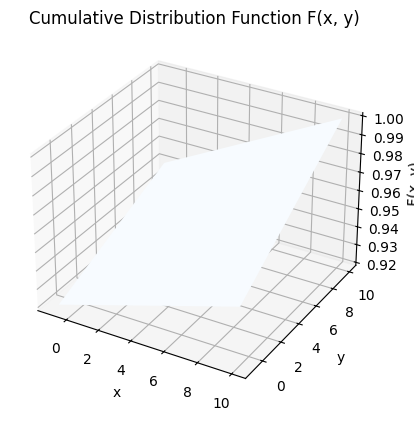

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 定义离散的联合概率 f(x, y)
fxy_values = {
    (0, 0): 92 / 100,
    (0, 1): 3 / 100,
    (1, 0): 3 / 100,
    (1, 1): 2 / 100
}

# 创建网格
x_values = [-1, 10]
y_values = [-1, 10]
X, Y = np.meshgrid(x_values, y_values)

# 计算累积分布 F(x, y)
F = np.zeros(X.shape)

for i in range(len(x_values)):
    for j in range(len(y_values)):
        # 计算 F(x, y)
        F[j, i] = sum(fxy_values[(k, l)] for k in range(i + 1) for l in range(j + 1))

# 绘制三维图
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, F, cmap='Blues')

# 设置图形标签
ax.set_title('Cumulative Distribution Function F(x, y)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('F(x, y)')

# 显示图形
plt.show()


In [64]:
import sympy as sp

sp.init_printing()
# 定义符号变量
x, y, x0, y0= sp.symbols('x y x0 y0')

z = sp.symbols('z', positive=True)
# 定义联合概率密度函数 f(x, y)
fxy = sp.Piecewise(
    (2*sp.exp(-(x + 2*y)), sp.And(x > 0, y > 0)),
    (0, True)
)

# # 计算累积分布函数 F(x0, y0)
# Fxy = sp.integrate(sp.integrate(fxy, (x, 0, x)), (y, 0, y))

# # 输出 F(x0, y0)
# sp.simplify(Fxy)
# sp.simplify(sp.expand((1-sp.exp(-2*x))*(1-sp.exp(-y))) - Fxy)

# p = sp.integrate(sp.integrate(fxy, (x, y, sp.oo)), (y,0,sp.oo))
# p

# p = sp.integrate(sp.integrate(fxy.subs(x, z - 2*y), (x, 0, z-2*y)), (y, 0, sp.oo))
# 改变量 Z = X + 2Y, 进行积分
p = sp.integrate(sp.integrate(fxy, (x, 0, z-2*y)), (y, 0, sp.oo))
print(sp.diff(p, z))
p

z*exp(-z)


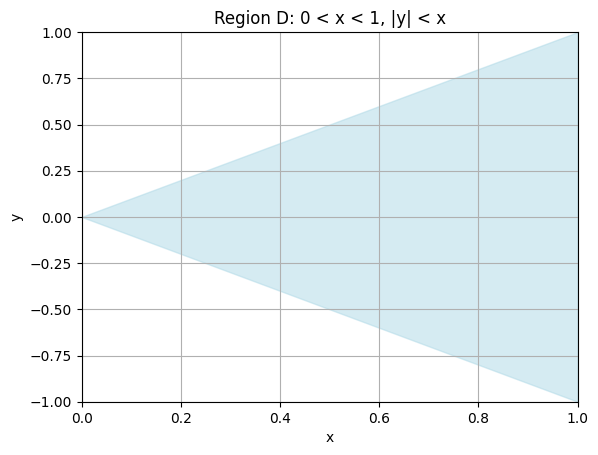

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# 定义 x 的范围
x = np.linspace(0, 1, 500)

# 对应的 y 的上下界
y_upper = x
y_lower = -x

# 使用 fill_between 填充区域
plt.fill_between(x, y_lower, y_upper, color='lightblue', alpha=0.5)

# 设置坐标轴范围
plt.xlim(0, 1)
plt.ylim(-1, 1)

# 设置图形标签
plt.title('Region D: 0 < x < 1, |y| < x')
plt.xlabel('x')
plt.ylabel('y')

# 显示图形
plt.grid(True)
plt.show()


In [61]:
import sympy as sp

# 定义符号变量
z = sp.Symbol('z')

# 定义表达式
expr = sp.exp(-2*sp.Max(0, z/2)) * sp.Heaviside(z/2) - sp.exp(-z) * sp.Heaviside(z/2) + 2 * sp.exp(-z) * sp.Max(0, z/2)

# 假定 z > 0 后对表达式进行化简
refined_expr = sp.refine(expr, sp.Q.positive(z))

# 输出化简后的结果
sp.pprint(refined_expr)

 -2⋅Max(0, z/2)  ⎛z⎞    -z  ⎛z⎞      -z            
ℯ              ⋅θ⎜─⎟ - ℯ  ⋅θ⎜─⎟ + 2⋅ℯ  ⋅Max(0, z/2)
                 ⎝2⎠        ⎝2⎠                    
